# figs_d25a.ipynb
Produce figures and analysis for manuscript.

Author: Benjamin S. Grandey.

In [1]:
import d25a
import datetime

In [2]:
# Get start datetime
start_dt = datetime.datetime.now()

In [3]:
# Print package versions
print(d25a.get_watermark())

Python implementation: CPython
Python version       : 3.10.16
IPython version      : 8.31.0

matplotlib: 3.10.0
numpy     : 2.2.2
pandas    : 2.2.3
seaborn   : 0.13.2
xarray    : 2025.1.1

conda environment: d25a-rsl-fusion

Compiler    : Clang 18.1.8 
OS          : Darwin
Release     : 22.6.0
Machine     : arm64
Processor   : arm
CPU cores   : 8
Architecture: 64bit



Called fig_fusion_time_series(gmsl, None, None)
Reading time_series/gmsl_fusion-ssp585_d25a.nc
Reading time_series/gmsl_high-end_d25a.nc
Reading time_series/gmsl_high_d25a.nc
Reading time_series/gmsl_central_d25a.nc
Reading time_series/gmsl_fusion-ssp126_d25a.nc
Reading time_series/gmsl_low_d25a.nc
Reading time_series/gmsl_central_d25a.nc
Written fig01.pdf (0.02 MB)
Written fig01.png (0.24 MB)


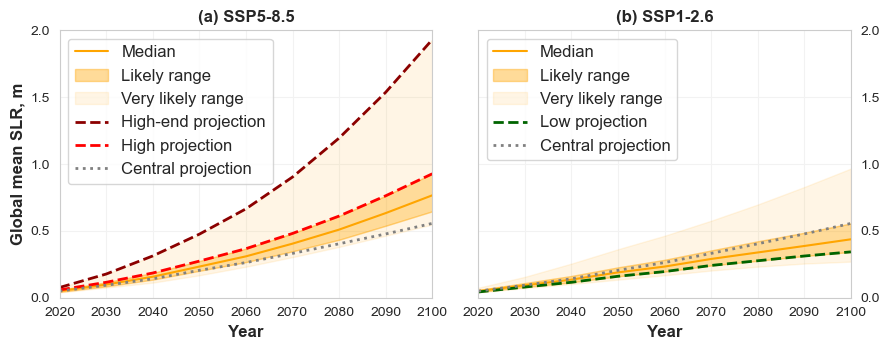

In [4]:
# Time series of GMSL
fig, axs = d25a.fig_fusion_time_series(slr_str='gmsl', gauges_str=None, loc_str=None)
_ = d25a.name_save_fig(fig, fso='f')

In [5]:
# Table of year-2100 global mean SLR projections and probability of exceedance
gmsl_df = d25a.get_gmsl_df().copy()
gmsl_df['gmsl_2100'] = gmsl_df['gmsl_2100'].round(2)  # round to nearest cm
for col in ['p_ssp126', 'p_ssp585']:  # round to nearest .1%
    gmsl_df[col] = gmsl_df[col].round(1)
gmsl_df.index = gmsl_df.index.str.capitalize()  # capitalize low -> Low etc
gmsl_df = gmsl_df.rename(columns={'definition': 'Definition',  # rename columns
                                  'gmsl_2100': 'Global mean SLR in 2100, m',
                                  'p_ssp126': 'Probability under SSP1-2.6, %',
                                  'p_ssp585': 'Probability under SSP5-8.5, %'})
print(gmsl_df.to_csv(sep='\t'))  # suitable for Word's 'Convert Text to Table'
gmsl_df

Reading time_series/gmsl_low_d25a.nc
Reading time_series/gmsl_central_d25a.nc
Reading time_series/gmsl_high_d25a.nc
Reading time_series/gmsl_high-end_d25a.nc
Reading time_series/gmsl_fusion-ssp126_d25a.nc
Reading time_series/gmsl_fusion-ssp585_d25a.nc
Reading time_series/gmsl_fusion-ssp126_d25a.nc
Reading time_series/gmsl_fusion-ssp585_d25a.nc
Reading time_series/gmsl_fusion-ssp126_d25a.nc
Reading time_series/gmsl_fusion-ssp585_d25a.nc
Reading time_series/gmsl_fusion-ssp126_d25a.nc
Reading time_series/gmsl_fusion-ssp585_d25a.nc
	Definition	Global mean SLR in 2100, m	Probability under SSP1-2.6, %	Probability under SSP5-8.5, %
Low	17th %ile under SSP1-2.6	0.34	83.0	99.2
Central	50th %ile under SSP2-4.5	0.56	17.0	94.5
High	83rd %ile under SSP2-4.5	0.93	5.7	17.0
High-end	95th %ile under SSP5-8.5	1.93	0.1	5.0



,Definition,"Global mean SLR in 2100, m","Probability under SSP1-2.6, %","Probability under SSP5-8.5, %"
Low,17th %ile under SSP1-2.6,0.34,83.0,99.2
Central,50th %ile under SSP2-4.5,0.56,17.0,94.5
High,83rd %ile under SSP2-4.5,0.93,5.7,17.0
High-end,95th %ile under SSP5-8.5,1.93,0.1,5.0


Reading year_2100/novlm_grid_2100_d25a.csv
Plotting projection for 615 locations.
Written fig02.pdf (0.06 MB)
Written fig02.png (0.25 MB)


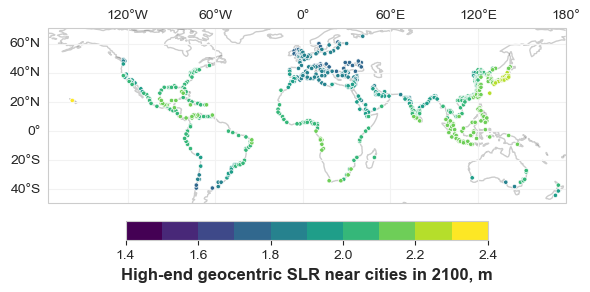

In [6]:
# Map showing high-end geocentric SLR projection
fig, ax = d25a.fig_year_2100_map(slr_str='novlm', gauges_str='grid', proj_str='high-end', vmin=1.4, vmax=2.4)
_ = d25a.name_save_fig(fig, fso='f')

Reading year_2100/novlm_grid_megacities_2100_d25a.csv
Reading time_series/gmsl_high-end_d25a.nc
Reading time_series/gmsl_high_d25a.nc
Reading time_series/gmsl_central_d25a.nc
Reading time_series/gmsl_low_d25a.nc
Written fig03.pdf (0.03 MB)
Written fig03.png (0.53 MB)


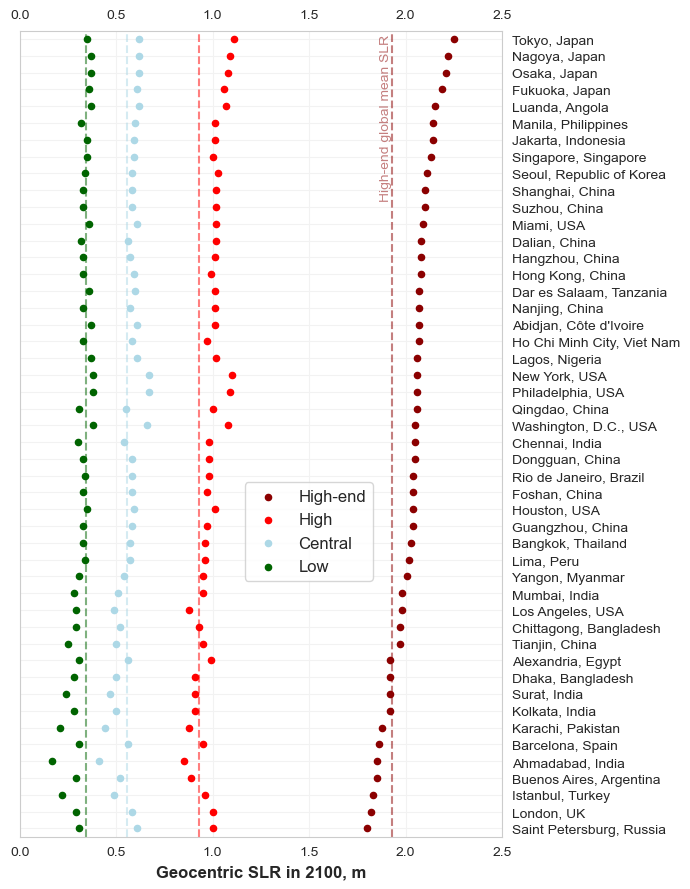

In [7]:
# Geocentric SLR projections for megacities
fig, ax = d25a.fig_year_2100_megacities()
_ = d25a.name_save_fig(fig, fso='f')

In [8]:
# Table of summary statistics across cities for geocentric SLR in 2100 (mean, IQR, range, % above global mean)
summary_df = d25a.get_year_2100_summary_df(slr_str='novlm', gauges_str='grid', cities_str='cities').copy()
print(f'Count = {summary_df.loc["Count", "high-end"]}')
summary_df = summary_df.drop('Count')  # don't show Count column
summary_df.columns = summary_df.columns.str.capitalize()  # capitalize low -> Low etc
summary_df = summary_df.T  # transpose rows and columns
print(summary_df.to_csv(sep='\t'))  # suitable for Word's 'Convert Text to Table'
summary_df

Reading year_2100/novlm_grid_cities_2100_d25a.csv
Reading time_series/gmsl_low_d25a.nc
Reading time_series/gmsl_central_d25a.nc
Reading time_series/gmsl_high_d25a.nc
Reading time_series/gmsl_high-end_d25a.nc
Count = 875
	Median, m	IQR, m	Range, m	Proportion above global mean SLR, %
Low	0.3	0.3 to 0.4	0.2 to 0.4	26
Central	0.6	0.6 to 0.6	0.4 to 0.7	71
High	1.0	1.0 to 1.0	0.8 to 1.1	88
High-end	2.0	1.9 to 2.1	1.7 to 2.4	73



,"Median, m","IQR, m","Range, m","Proportion above global mean SLR, %"
Low,0.3,0.3 to 0.4,0.2 to 0.4,26
Central,0.6,0.6 to 0.6,0.4 to 0.7,71
High,1.0,1.0 to 1.0,0.8 to 1.1,88
High-end,2.0,1.9 to 2.1,1.7 to 2.4,73


Reading year_2100/rsl_gauges_2100_d25a.csv
Plotting projection for 1016 locations.
Written s01.pdf (0.08 MB)
Written s01.png (0.30 MB)


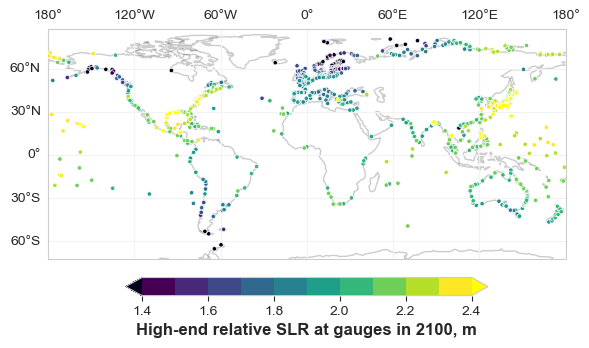

In [9]:
# Map showing high-end relative SLR projection at gauges
fig, ax = d25a.fig_year_2100_map(slr_str='rsl', gauges_str='gauges', proj_str='high-end', vmin=1.4, vmax=2.4)
_ = d25a.name_save_fig(fig, fso='s')

Reading year_2100/rsl_gauges_2100_d25a.csv
Reading time_series/gmsl_high-end_d25a.nc
Reading time_series/gmsl_high_d25a.nc
Reading time_series/gmsl_central_d25a.nc
Reading time_series/gmsl_low_d25a.nc
Written s02.pdf (0.03 MB)
Written s02.png (0.47 MB)


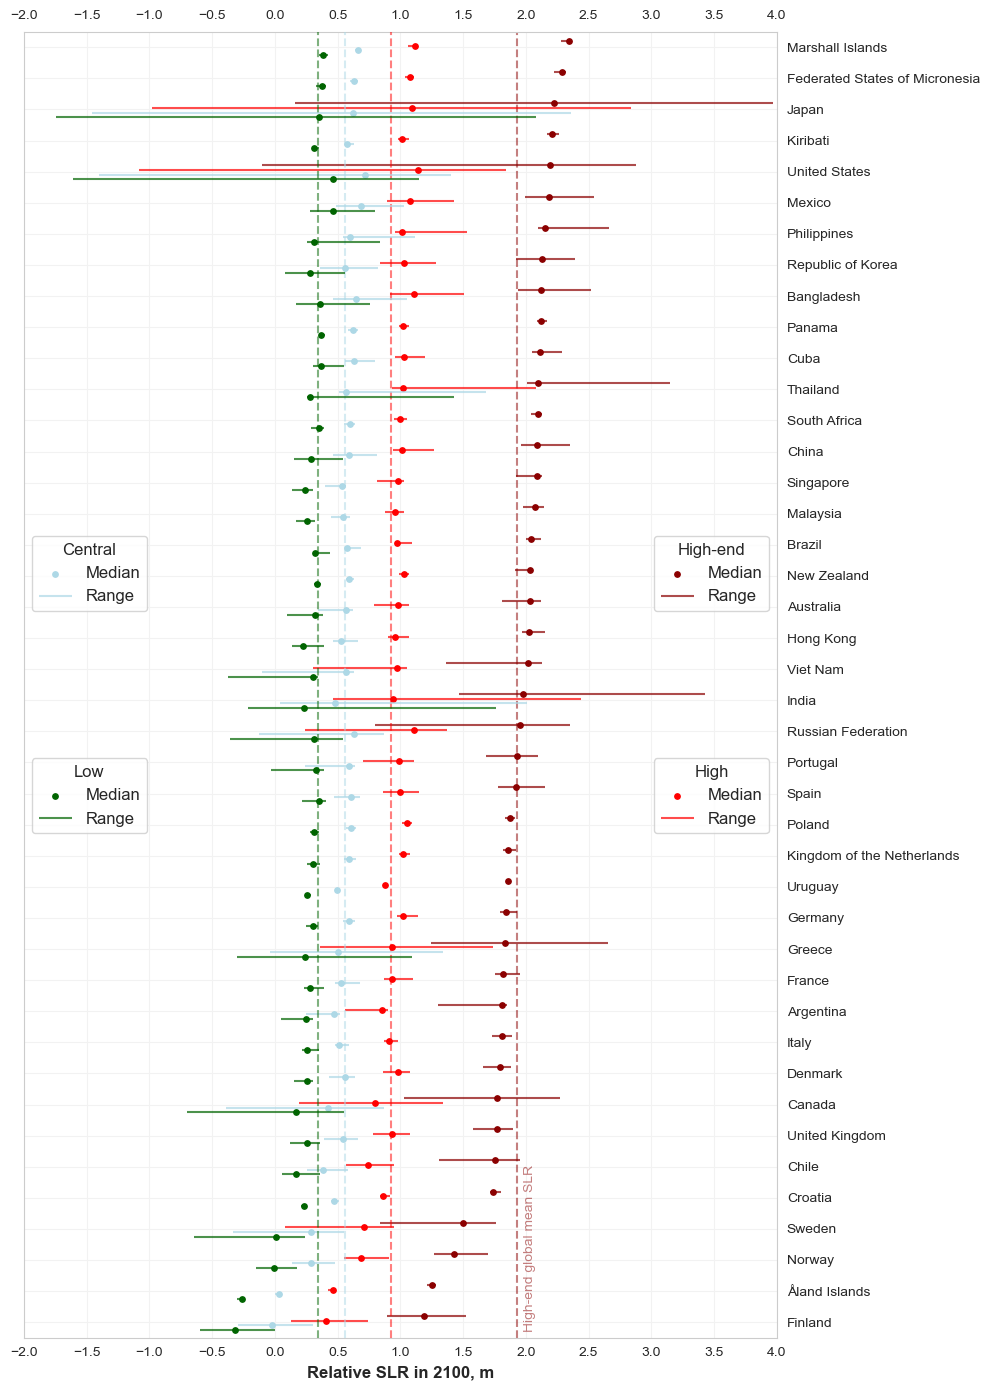

In [10]:
# Country-level statistics of relative SLR in 2100
fig, axs = d25a.fig_country_stats(slr_str='rsl', min_count=4, high_end_only=False)
_ = d25a.name_save_fig(fig, fso='s')

Reading year_2100/rsl_gauges_2100_d25a.csv
Reading year_2100/novlm_gauges_2100_d25a.csv
Written s03.pdf (0.03 MB)
Written s03.png (0.31 MB)


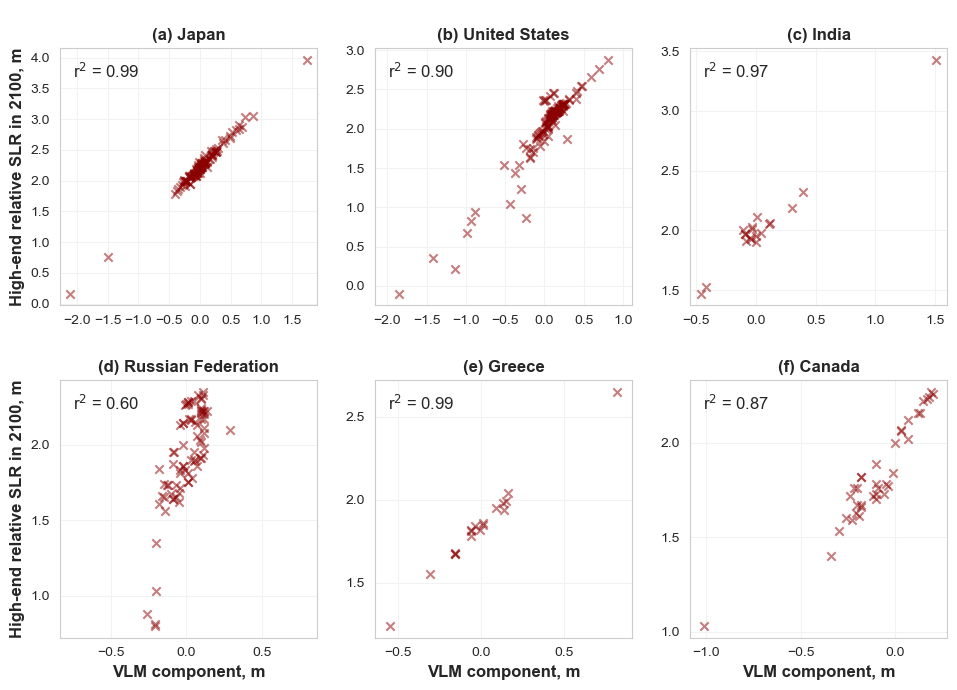

In [11]:
# High-end relative SLR vs VLM component for countries with the largest ranges.
fig, axs = d25a.fig_rsl_vs_vlm()
_ = d25a.name_save_fig(fig, fso='s')

In [12]:
# Get end datetime
end_dt = datetime.datetime.now()
# Calculate run timedelta
run_td = end_dt - start_dt
# Print timing information
print(f"Start:     {start_dt.strftime('%Y-%m-%d %H:%M:%S')}")
print(f"End:       {end_dt.strftime('%Y-%m-%d %H:%M:%S')}")
print(f"Wall time: {run_td.seconds} s")

Start:     2025-05-09 11:20:54
End:       2025-05-09 11:21:00
Wall time: 5 s
